# India Moving Towards Clean Fuels

The world is changing fast and its changing for Good. The world today is speaking of zero carbon foot prints. And the biggest element that drives both the economy and carbon foot prints is Fuel. So, the world will only change if its fuel changes to clean low emissions. 

Now coming to the Indian Stage. We need to understand whether the people of India driven by the policy makers, have really been impacted by the goal of Low Emission Fuel & Clean Energy.


*Fiscal Years starts from April in India*


# **Vehicle Registration in India categorised by Fuel Type**

# **INSTALL PACKAGES**

In [39]:
# Installing all packages
library(tidyverse) 
library("lubridate") 
library(dplyr)


# **READ DATASET**

The data set has already been added to the kernel.
In the next step we will try to read the 'csv' data set.

All the columns has been read as charecters so as to have an uniformity in reading csv. The data cleaning exercise will take care of the values and dates columns.

In [22]:

#Find the File list
#list.files(path = "../input/fuel-type-wise-vehicle-registration-india")

#Read Csv
vehicle_regn <- read.csv("/content/fuel.csv",
                        colClasses="character")
glimpse(vehicle_regn)


Rows: 60
Columns: 12
$ Month          <chr> "Apr-17", "May-17", "Jun-17", "Jul-17", "Aug-17", "Sep-…
$ CNG.Only       <chr> "1,825", "1,918", "2,352", "2,081", "1,532", "1,745", "…
$ DIESEL         <chr> "1,93,689", "1,82,173", "1,94,894", "1,96,529", "1,85,9…
$ Diesel.Hybrid  <chr> "3,412", "4,172", "4,717", "4,161", "3,201", "3,440", "…
$ Electric..BOV. <chr> "5,063", "7,080", "7,508", "9,031", "9,174", "7,795", "…
$ LPG.Only       <chr> "89", "160", "218", "521", "643", "532", "212", "422", …
$ Petrol         <chr> "14,32,174", "15,10,907", "14,23,800", "13,09,851", "12…
$ Petrol.CNG     <chr> "16,879", "17,968", "18,768", "18,069", "20,652", "25,7…
$ Petrol.Hybrid  <chr> "108", "88", "123", "30", "31", "36", "35", "22", "19",…
$ Petrol.LPG     <chr> "4,941", "5,198", "6,000", "5,427", "5,891", "6,189", "…
$ Ethanol        <chr> "1", "1", "1", "1", "", "", "", "6", "11", "6", "", "",…
$ Not.Applicable <chr> "6,784", "7,403", "6,784", "6,897", "5,359", "6,264", "…


# **DATA CLEANING PROCESS**

The data cleaning exercise has been taken up in different steps:



### Data Cleaning

**Step 1. Assigning new names to columns for easier handling**

In [23]:
# assigning new names to the columns of the data frame
colnames(vehicle_regn) <- c("month_year", "cng_only","diesel_only","diesel_hybrid","electric_only",
                           "lpg_only","petrol_only","petrol_cng","petrol_hybrid","petrol_lpg",
                           "ethanol","misc")
glimpse(vehicle_regn)

Rows: 60
Columns: 12
$ month_year    <chr> "Apr-17", "May-17", "Jun-17", "Jul-17", "Aug-17", "Sep-1…
$ cng_only      <chr> "1,825", "1,918", "2,352", "2,081", "1,532", "1,745", "2…
$ diesel_only   <chr> "1,93,689", "1,82,173", "1,94,894", "1,96,529", "1,85,96…
$ diesel_hybrid <chr> "3,412", "4,172", "4,717", "4,161", "3,201", "3,440", "4…
$ electric_only <chr> "5,063", "7,080", "7,508", "9,031", "9,174", "7,795", "7…
$ lpg_only      <chr> "89", "160", "218", "521", "643", "532", "212", "422", "…
$ petrol_only   <chr> "14,32,174", "15,10,907", "14,23,800", "13,09,851", "12,…
$ petrol_cng    <chr> "16,879", "17,968", "18,768", "18,069", "20,652", "25,74…
$ petrol_hybrid <chr> "108", "88", "123", "30", "31", "36", "35", "22", "19", …
$ petrol_lpg    <chr> "4,941", "5,198", "6,000", "5,427", "5,891", "6,189", "7…
$ ethanol       <chr> "1", "1", "1", "1", "", "", "", "6", "11", "6", "", "", …
$ misc          <chr> "6,784", "7,403", "6,784", "6,897", "5,359", "6,264", "6…


### Data Cleaning 

**Step 2. Converting Data Frame from Wide to long**

In [24]:
#Data Cleaning: Convert Data Frame from Wide to long
vehicle <- vehicle_regn %>%
    pivot_longer(cols = c("cng_only","diesel_only","diesel_hybrid","electric_only",
                           "lpg_only","petrol_only","petrol_cng","petrol_hybrid","petrol_lpg",
                           "ethanol","misc"),
                names_to = "fuel_type",
                values_to = "no_of_vehicles")



### Data Cleaning 

**Step 3. The data has been read as characters.**

The value columns will be converted to Numbers. Moreover, we also understand the values also has inbetween commas.
And the Month column will be converted to Date

In [25]:
#Data Cleaning : Convert chr to Numeric for Nos of Vehicles
vehicle$no_of_vehicles <- as.numeric(gsub(",", "",vehicle$no_of_vehicles))
#Data Cleaning : Convert Month Column(chr) to Date 
vehicle$month_year <- my(vehicle$month_year)
glimpse(vehicle)



Rows: 660
Columns: 3
$ month_year     <date> 2017-04-01, 2017-04-01, 2017-04-01, 2017-04-01, 2017-0…
$ fuel_type      <chr> "cng_only", "diesel_only", "diesel_hybrid", "electric_o…
$ no_of_vehicles <dbl> 1825, 193689, 3412, 5063, 89, 1432174, 16879, 108, 4941…


### Data Cleaning 

**Step 4. Replacing Missing Values with 0**

In [26]:
#Data Cleaning : Replace missing values with 0
vehicle[is.na(vehicle)] = 0



### Data Cleaning 

**Step 5. Checking the Clean Data once again**

In [27]:
#Data Cleaning : Checking sum of set
vehicle %>%
    summarize(total_nos <- sum(no_of_vehicles))

#Data Cleaning : Checking sum of set by Group
vehicle %>%
    select(fuel_type,no_of_vehicles) %>%
    group_by(fuel_type) %>%
    summarize(total_nos_by_fuel <- sum(no_of_vehicles))

total_nos <- sum(no_of_vehicles)
<dbl>
96164469


fuel_type,total_nos_by_fuel <- sum(no_of_vehicles)
<chr>,<dbl>
cng_only,350779
diesel_hybrid,129095
diesel_only,11005099
electric_only,975568
ethanol,57
lpg_only,37711
misc,342340
petrol_cng,1466097
petrol_hybrid,323467


### Data Cleaning 

**Step 6. Creation of Fiscal Years**

As per the problem, the data is to be analysed with respect to Fiscal year.

We need to add the fiscal year column to the data set

In [28]:
#Create Fiscal Year
dates <- as.POSIXct(vehicle$month_year)
fy.tmp <- seq( as.POSIXct('2015-04-01'), length=25, by='year')
fy <- (2015:2025)[ findInterval(dates, fy.tmp)]
fiscal_year <- paste('FY',fy,'-',fy+1)

#Add Fiscal Year column after Month Year column
vehicle <- vehicle %>%
    mutate (fiscal_year, .after = month_year)

head(vehicle)
    

month_year,fiscal_year,fuel_type,no_of_vehicles
<date>,<chr>,<chr>,<dbl>
2017-04-01,FY 2017 - 2018,cng_only,1825
2017-04-01,FY 2017 - 2018,diesel_only,193689
2017-04-01,FY 2017 - 2018,diesel_hybrid,3412
2017-04-01,FY 2017 - 2018,electric_only,5063
2017-04-01,FY 2017 - 2018,lpg_only,89
2017-04-01,FY 2017 - 2018,petrol_only,1432174


## Data Analysis

Once we are confident regarding the data cleaning exercise, we will jump on to the data analysis world.

### Data Analysis 

**Chart 1 : Compare the trends of vehicle registration in India over the last 5 years**

Output : The data clearly shows that there has been an adverse effect of Covid in vehicle registration. There is a huge drop in FY 2020-21, where in COVID was at its peak. The registrations has recovered in FY 2021-22 but not to the pre COVID levels.

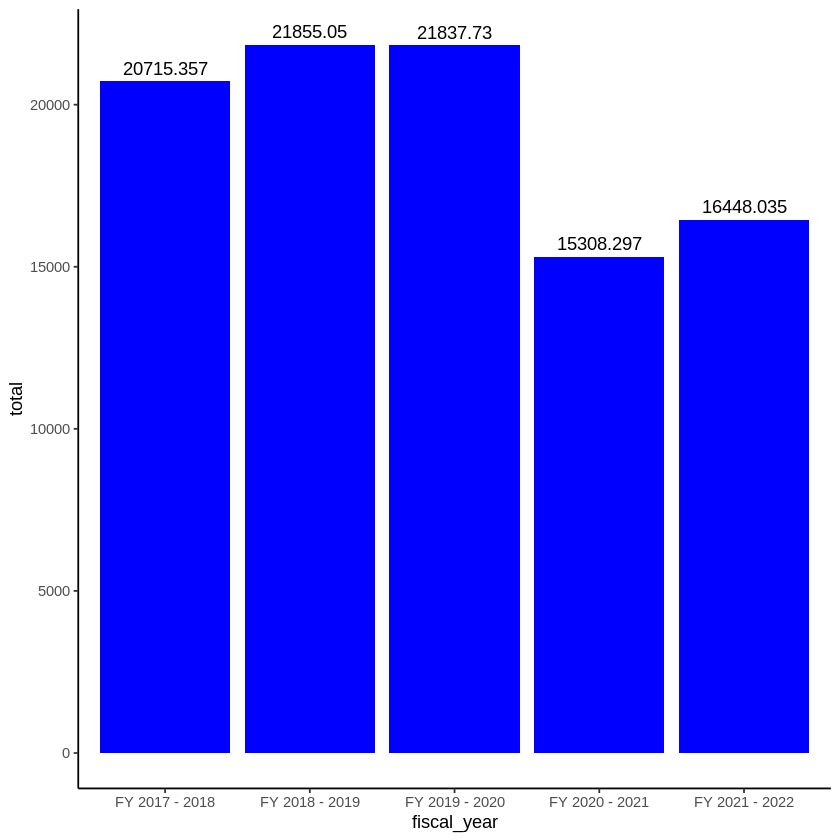

In [29]:
#Data Viz : Total Vehicles registered by Fiscal Year
vehicle %>%
    select(fiscal_year,fuel_type, no_of_vehicles) %>%
    group_by(fiscal_year) %>%
    summarise(total = (sum(no_of_vehicles))/1000) %>%
    ggplot(aes(x=fiscal_year, y = total)) + 
    geom_bar(stat = "identity", fill = "blue")+
    theme_classic() +
    geom_text(aes(label = total), vjust = -0.5)

### Data Analysis 

**Chart 2 : Compare the trends of vehicle registration in India categorised into Fuel_type over the last 5 years**

Output : The chart is dominated by Petrol and Diesel vehicles. It is evident that there is decline in the same. But the chart doesn't give a clear picture to our problem statement of clear fuels.

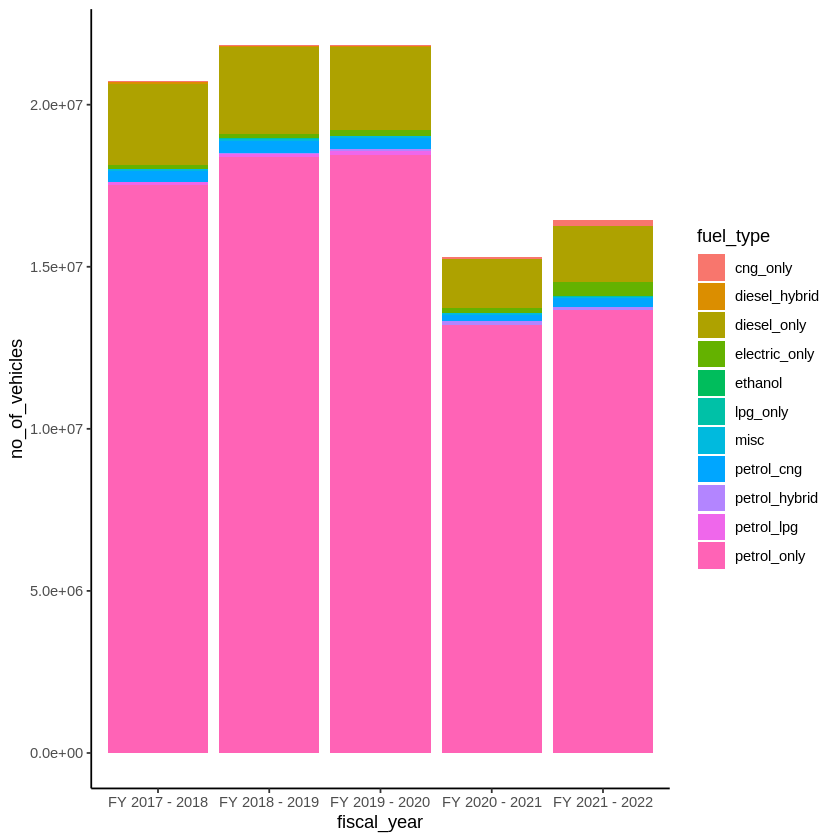

In [30]:
#Data Viz : Total Vehicles registered by Fiscal Year and distinguished by fuel type
vehicle %>%
    select(fiscal_year, fuel_type, no_of_vehicles) %>%
    group_by(fiscal_year) %>%
    ggplot(aes(x = fiscal_year, y = no_of_vehicles, fill = fuel_type)) + 
    geom_col()+
    theme_classic()

### Data Analysis 

**Chart 3 : Compare the trends of vehicle registration in India categorised into Fuel_type over the last 5 years**

Output : The chart has been prepared to bifurcate into multiple columns. Again, the chart is dominated by Petrol and Diesel vehicles. It is evident that there is decline in the same. But the chart doesn't give a clear picture to our problem statement of clear fuels.

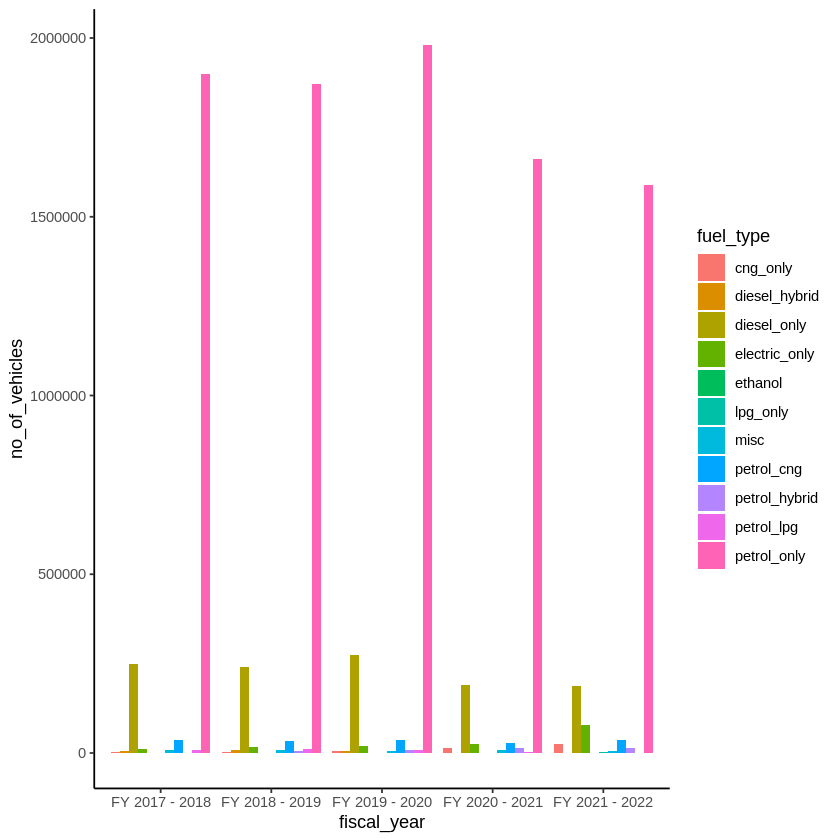

In [31]:
#Data Viz : Total Vehicles registered by Fiscal Year and distinguished by fuel type
vehicle %>%
    select(fiscal_year, fuel_type, no_of_vehicles) %>%
    group_by(fiscal_year) %>%
    ggplot(aes(x = fiscal_year, y = no_of_vehicles)) + 
    geom_bar(aes(fill = fuel_type),stat = "identity",position = "dodge")+
    theme_classic()

### Data Analysis 

**Chart 4 : Compare the trends of vehicle registration in India in Fuel Type**

Output : It must be admitted that the chart is of not much use. However, the same has been kept for learning purpose

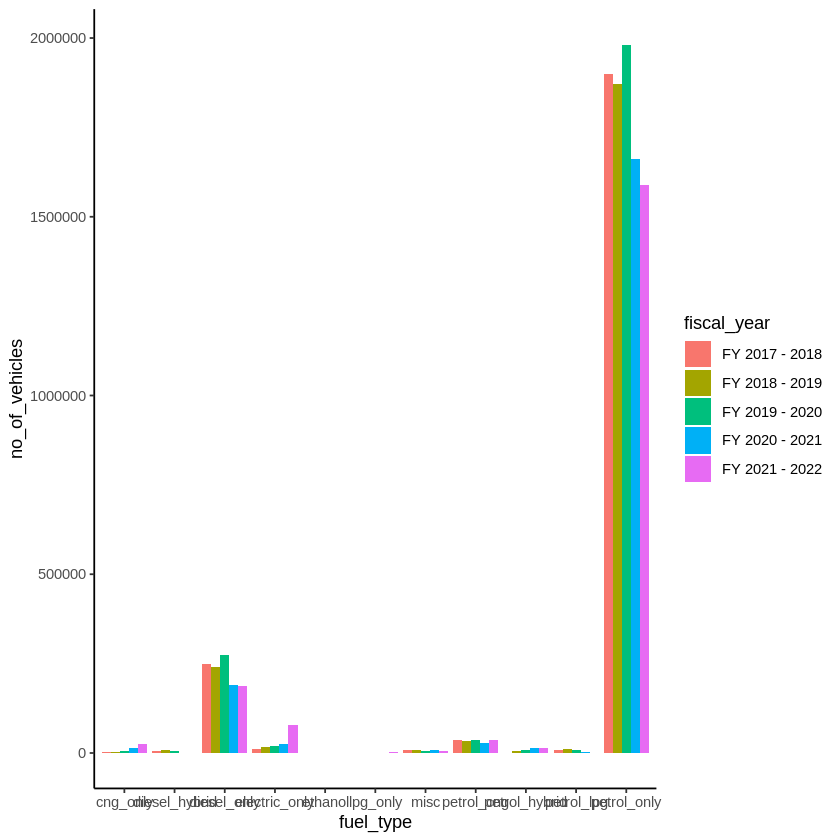

In [32]:
#Data Viz : Total Vehicles registered by Fiscal Year and distinguished by fuel type
vehicle %>%
    select(fiscal_year, fuel_type, no_of_vehicles) %>%
    group_by(fuel_type) %>%
    ggplot(aes(x = fuel_type, y = no_of_vehicles)) + 
    geom_bar(aes(fill = fiscal_year),stat = "identity",position = "dodge")+
    theme_classic()

### Data Analysis 

**Chart 5 : Breaking up the Fuel Type vehicle registration trends in smaller charts**

Output : The chart gives us an excellent understanding of the data set. It clearly indicates that vehicles run by Fossil Fuels including hybrid versions are in a decline where in Clean Energy Vehicles are on a rise.

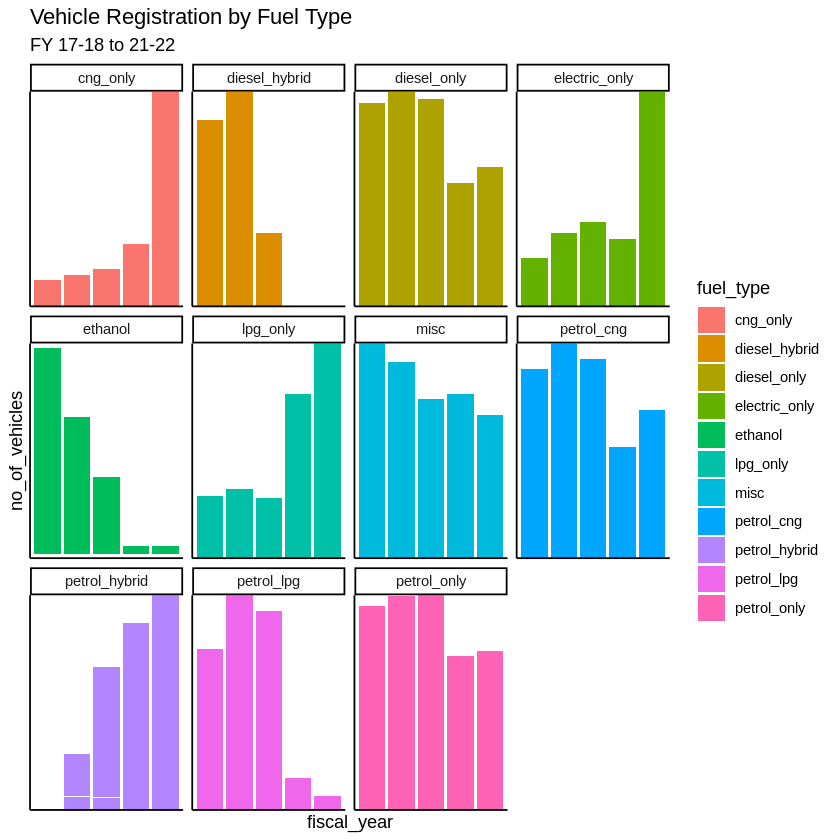

In [33]:
#Data Viz : Total Vehicles registered by Fiscal Year and distinguished by fuel type with Fiscal Year
vehicle %>%
    select(fiscal_year, fuel_type, no_of_vehicles) %>%
    group_by(fiscal_year) %>%
    ggplot(aes(x = fiscal_year, y = no_of_vehicles)) + 
    geom_bar(aes(fill = fuel_type),stat = "identity")+
    facet_wrap(~fuel_type, scales = "free")+
    theme_classic()+ #White Backgroud
    scale_x_discrete(labels = NULL, breaks = NULL)+ #Remove x axis and y axis labels
    scale_y_discrete(labels = NULL, breaks = NULL)+
    labs(title = "Vehicle Registration by Fuel Type", subtitle = "FY 17-18 to 21-22") #Create Title and Subtitle
    
    

### Data Analysis 

**Chart 6 : Line Chart with normalised data**

Output : The data has been normalised. The chart again proves our previous understanding of decline of fossil fuel vehicles. It doesnt give us a clear picture on clean fuel as the nos. are quite small.

`geom_smooth()` using formula = 'y ~ x'


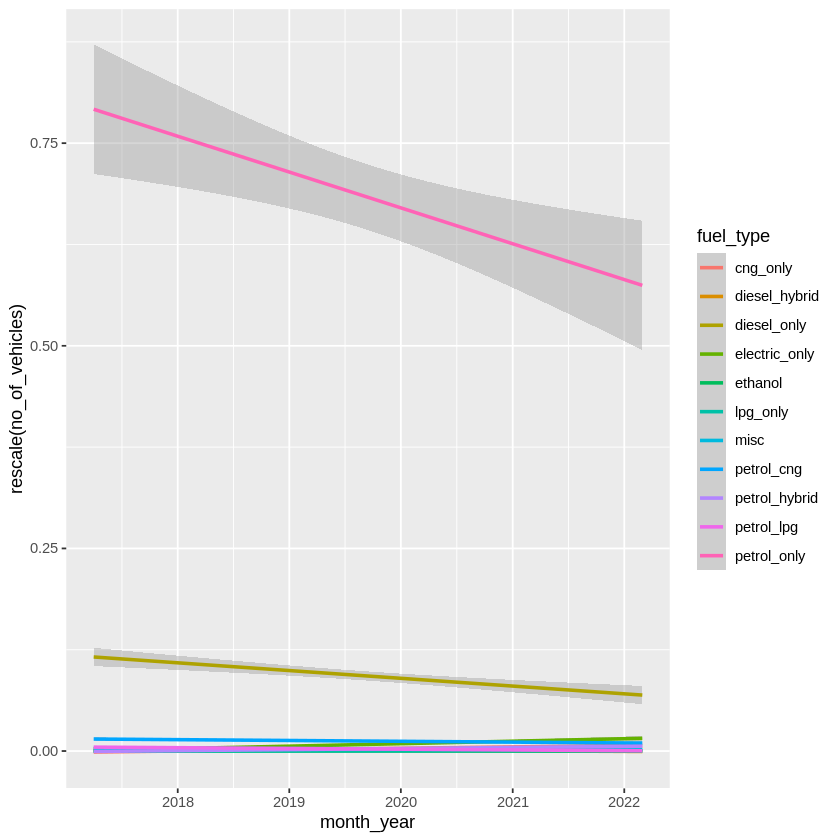

In [34]:
library(scales)
vehicle %>%
    select(month_year, fuel_type, no_of_vehicles) %>%
    group_by(month_year) %>%
    ggplot(aes(x = month_year, y = rescale(no_of_vehicles), colour = fuel_type)) + 
    geom_smooth(method=lm)
    

### Data Analysis 

In the previous analysis, it would be better to categorise the vehicles registered in specifically 3 catergories for better understanding of clean fuels:

1. Vehicles run on **Fossil Fuel** running solely on Petrol and Diesel
2. Vehicles run on **Clean Fuel** running solely on Electric, CNG and Ethanol
3. Vehicles run on **Hybrid Fuel** running on both Fossil and Clean Fuels

Hence, a new data set has been created with the column for fuel energy type.

In [35]:
fuel_energy_type <- vehicle %>%
        select(month_year,fiscal_year,fuel_type,no_of_vehicles)%>%
        group_by(month_year) %>%
        summarise(fossil_fuel = sum(no_of_vehicles[fuel_type == "petrol_only"|fuel_type =="diesel_only"]),
                 clean_fuel = sum(no_of_vehicles[fuel_type == "cng_only"|fuel_type =="electric_only"|fuel_type =="lpg_only"]),
                 hybrid_fuel = sum(no_of_vehicles[fuel_type == "diesel_hybrid"|fuel_type =="petrol_cng"|fuel_type =="petrol_hybrid"|fuel_type =="petrol_lpg"]))
       

head(fuel_energy_type)

month_year,fossil_fuel,clean_fuel,hybrid_fuel
<date>,<dbl>,<dbl>,<dbl>
2017-04-01,1625863,6977,25340
2017-05-01,1693080,9158,27426
2017-06-01,1618694,10078,29608
2017-07-01,1506380,11633,27687
2017-08-01,1426973,11349,29775
2017-09-01,1459191,10072,35409


### Data Analysis 

**Chart 7 : Line Chart with normalised data for Fuel Energy Type**

Output: This was the chart that provides us the perfect analysis and clearly indicates *India moving towards Clean Fuel*.

However, the data gives us the rise over the months rather than fiscal year as is required.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


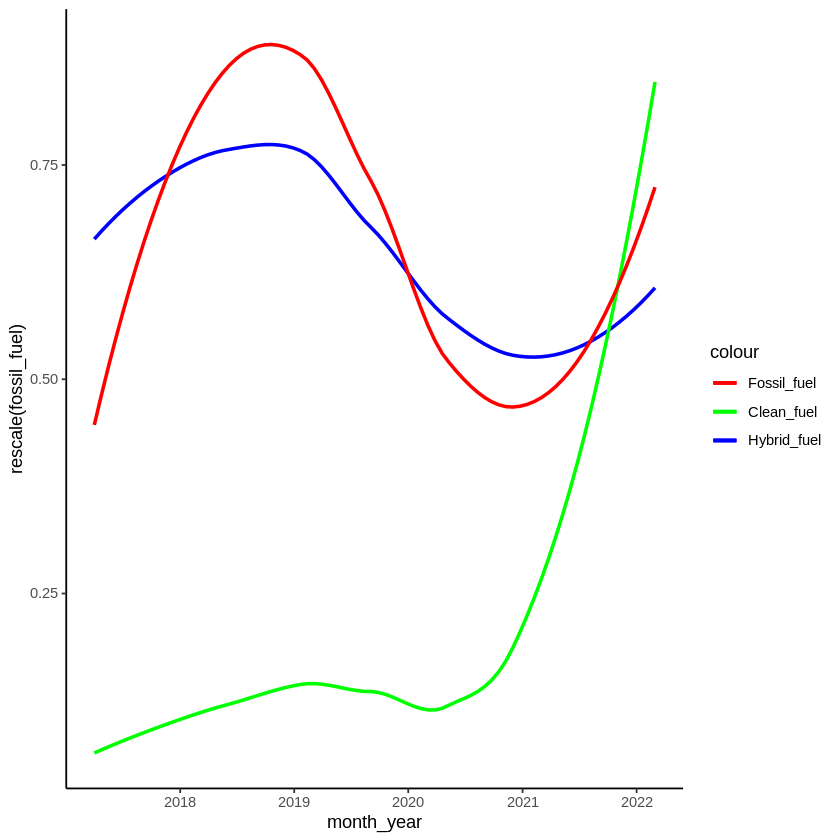

In [36]:
fuel_energy_plot <- fuel_energy_type %>%
    select(month_year, fossil_fuel, clean_fuel, hybrid_fuel) %>%
    ggplot() + 
    geom_smooth(aes(x = month_year, y = rescale(fossil_fuel), colour = "red"), se = FALSE)+ #add color and se=False means removing grey
    geom_smooth(aes(x = month_year, y = rescale(clean_fuel) , colour = "greeen"), se = FALSE)+
    geom_smooth(aes(x = month_year, y = rescale(hybrid_fuel), colour = "blue"), se = FALSE)+
    scale_colour_manual(values = c("red", "green", "blue"), #add data labels to chart
       labels = c("Fossil_fuel", "Clean_fuel", "Hybrid_fuel"))+
    theme_classic() 

fuel_energy_plot
#rename x - y axis

### Data Analysis 

To better understand Fiscal year approach, we modify our data set for fiscal years. 

In [37]:
fuel_energy_type_regn <- vehicle %>%
    select(month_year,fiscal_year, fuel_type, no_of_vehicles) %>%
    mutate(fuel_energy_type = ifelse (fuel_type == "petrol_only"|fuel_type =="diesel_only","fossil fuel",
                                     ifelse(fuel_type == "cng_only"|fuel_type =="electric_only"|fuel_type =="lpg_only","clean fuel",
                                      "hybrid fuel"))
          )
                               
head(fuel_energy_type_regn)

month_year,fiscal_year,fuel_type,no_of_vehicles,fuel_energy_type
<date>,<chr>,<chr>,<dbl>,<chr>
2017-04-01,FY 2017 - 2018,cng_only,1825,clean fuel
2017-04-01,FY 2017 - 2018,diesel_only,193689,fossil fuel
2017-04-01,FY 2017 - 2018,diesel_hybrid,3412,hybrid fuel
2017-04-01,FY 2017 - 2018,electric_only,5063,clean fuel
2017-04-01,FY 2017 - 2018,lpg_only,89,clean fuel
2017-04-01,FY 2017 - 2018,petrol_only,1432174,fossil fuel


### Data Analysis 

**Chart 8 : Bar Chart for Fuel Energy Type vehicle registration**

Output: This is the tooth in the nail and finalises our hypothesis *India moving towards Clean Fuel*.

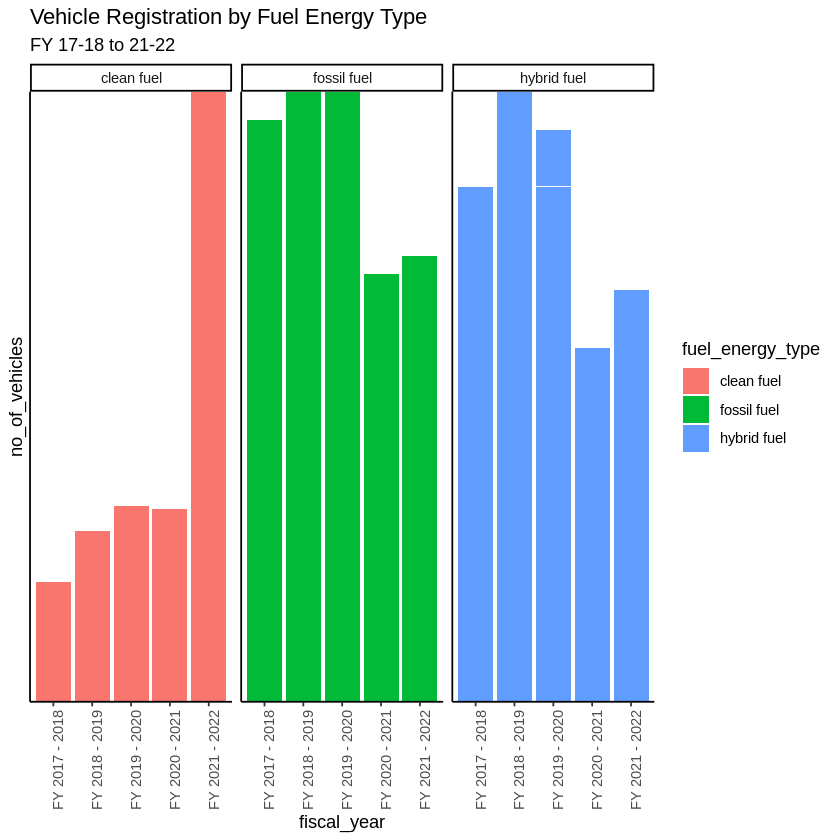

In [38]:
fuel_energy_type_plot <- fuel_energy_type_regn %>%
    select(fiscal_year, fuel_energy_type, no_of_vehicles) %>%
    group_by(fiscal_year) %>%
    ggplot(aes(x = fiscal_year, y = no_of_vehicles)) + 
    geom_bar(aes(fill = fuel_energy_type),stat = "identity")+
    facet_wrap(~fuel_energy_type, scales = "free")+ 
    theme_classic()+ #White Backgroud
    theme(axis.text.x = element_text(angle = 90))+ #Rotate x axis by 90 deg
    scale_y_discrete(labels = NULL, breaks = NULL)+ #Remove  y axis labels
    labs(title = "Vehicle Registration by Fuel Energy Type", subtitle = "FY 17-18 to 21-22") #Create Title and Subtitle

fuel_energy_type_plot